In [5]:
import pandas as pd

import matplotlib.pyplot as plt

In [4]:
df_raw_data = pd.read_csv('../data/processed_data/combined_data.csv')
df_raw_data['datetime'] = pd.to_datetime(df_raw_data['datetime'])
# make sure the sorting is correct
df_raw_data = df_raw_data.sort_values(by=['device','datetime']).reset_index(drop=True)
df_raw_data = df_raw_data.set_index('datetime')

In [22]:
def feature_plot(input: pd.DataFrame, device: str, color_map=plt.cm.tab10):

    df = input[input['device'] == device]
    

    fig, axs = plt.subplots(6, 1, figsize=(10, 18), sharex=True)

    # Assign a unique color to each device
    unique_devices = input['device'].unique()
    device_color = color_map(unique_devices.tolist().index(device) / len(unique_devices))


    for i, column in enumerate(['windspeed', 'pressure', 'temperature', 'humidity', 'sunlight', 'power']):
        axs[i].plot(df.index, df[column], color=device_color, marker='o', markersize=1)
        axs[i].set_title(f'{device}: {column.capitalize()} over Time')
        axs[i].set_ylabel(column.capitalize())


    axs[-1].set_xlabel('Datetime')


    plt.tight_layout()
    plt.show()

In [23]:
df_raw_data.device.value_counts().index

Index(['L8', 'L1', 'L17', 'L10', 'L9', 'L2', 'L15', 'L16', 'L12', 'L13', 'L14',
       'L11', 'L4', 'L3', 'L5', 'L6', 'L7'],
      dtype='object', name='device')

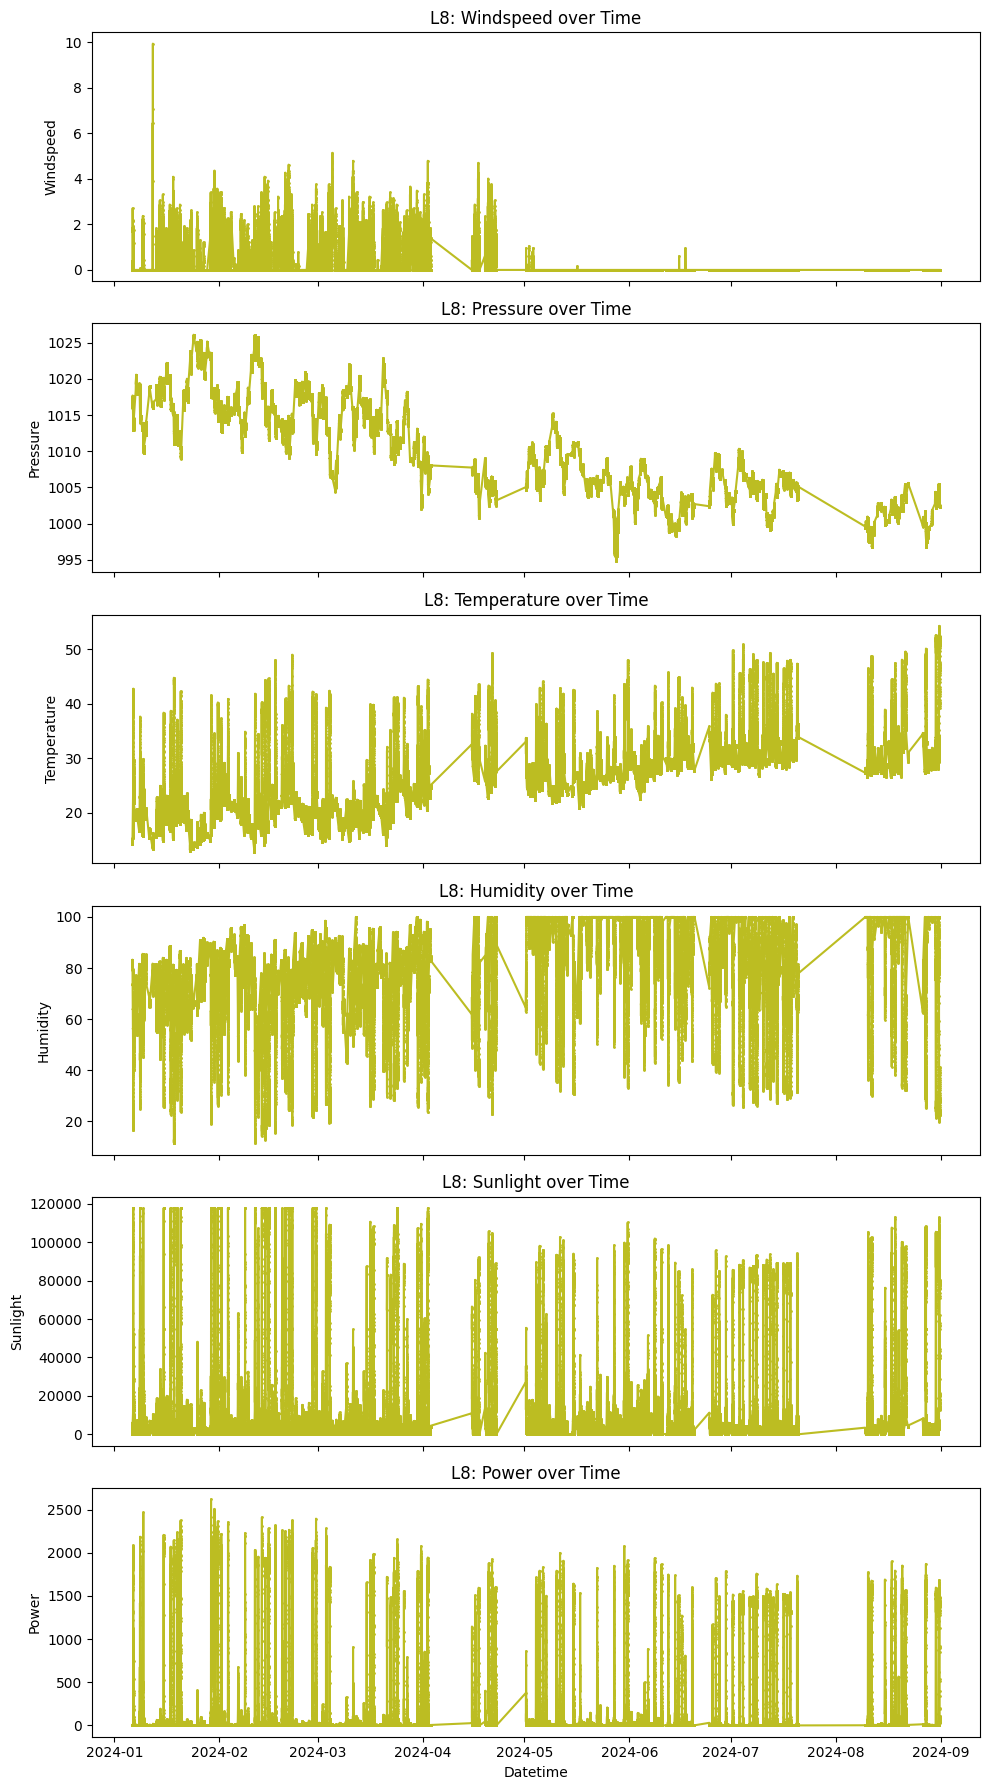

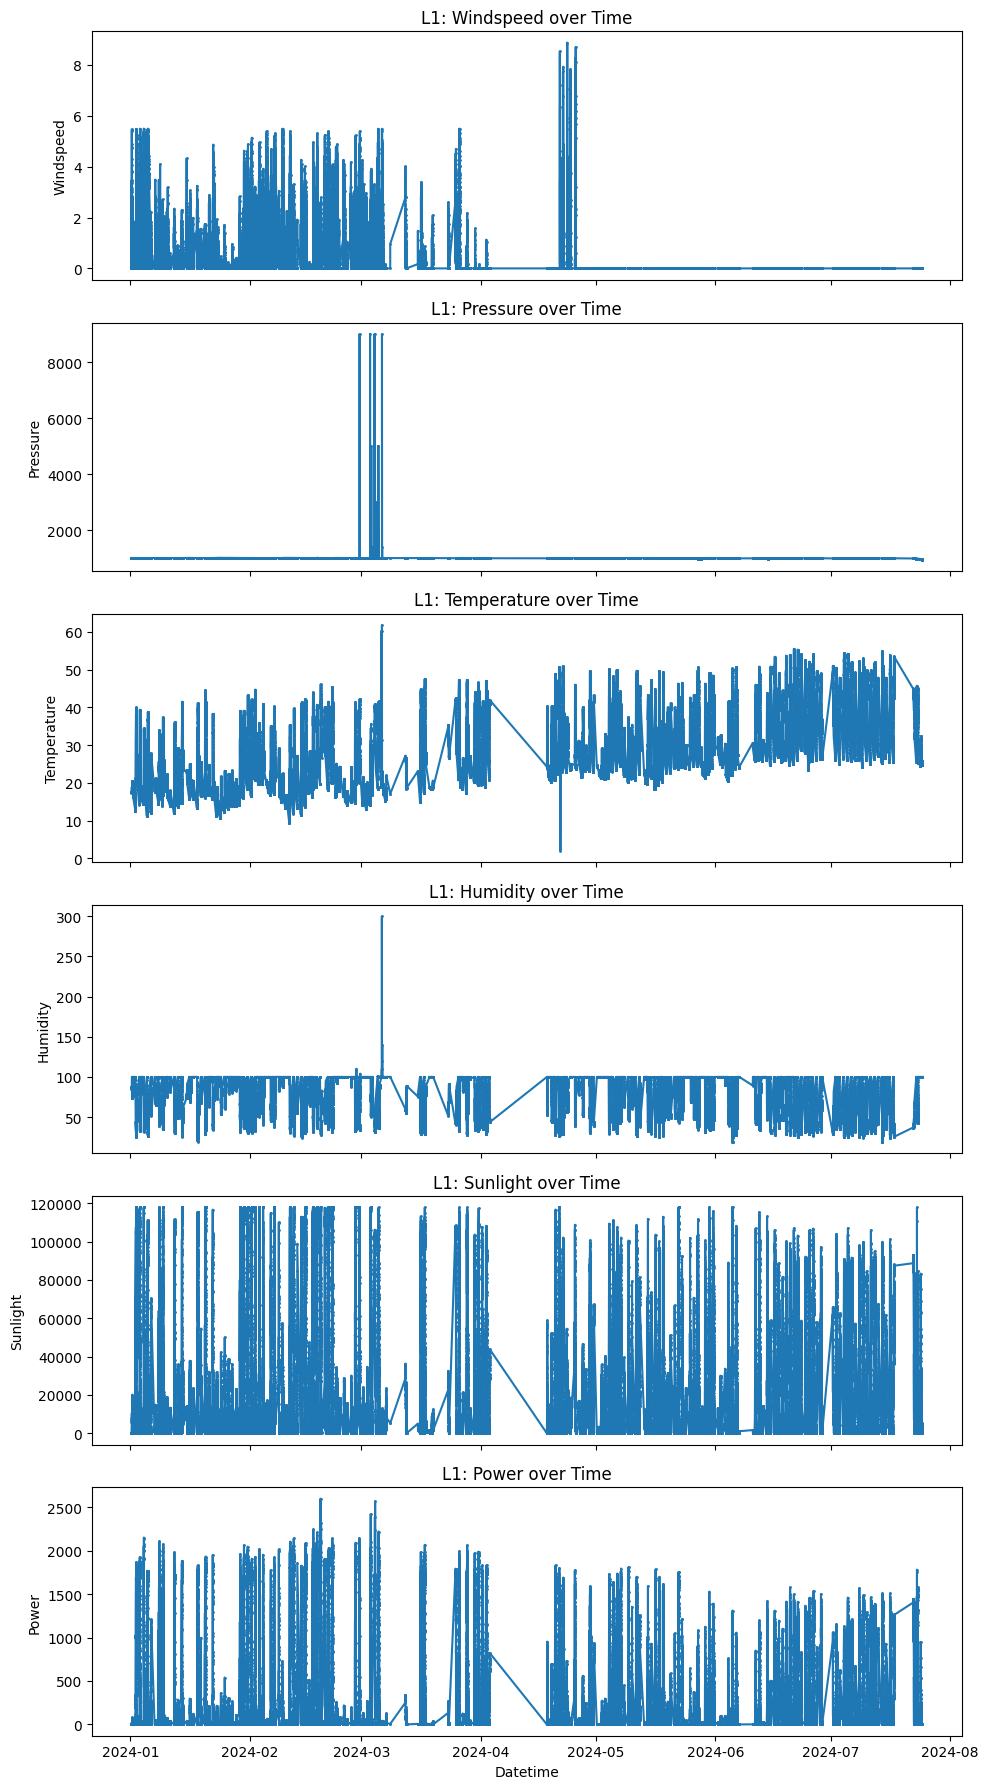

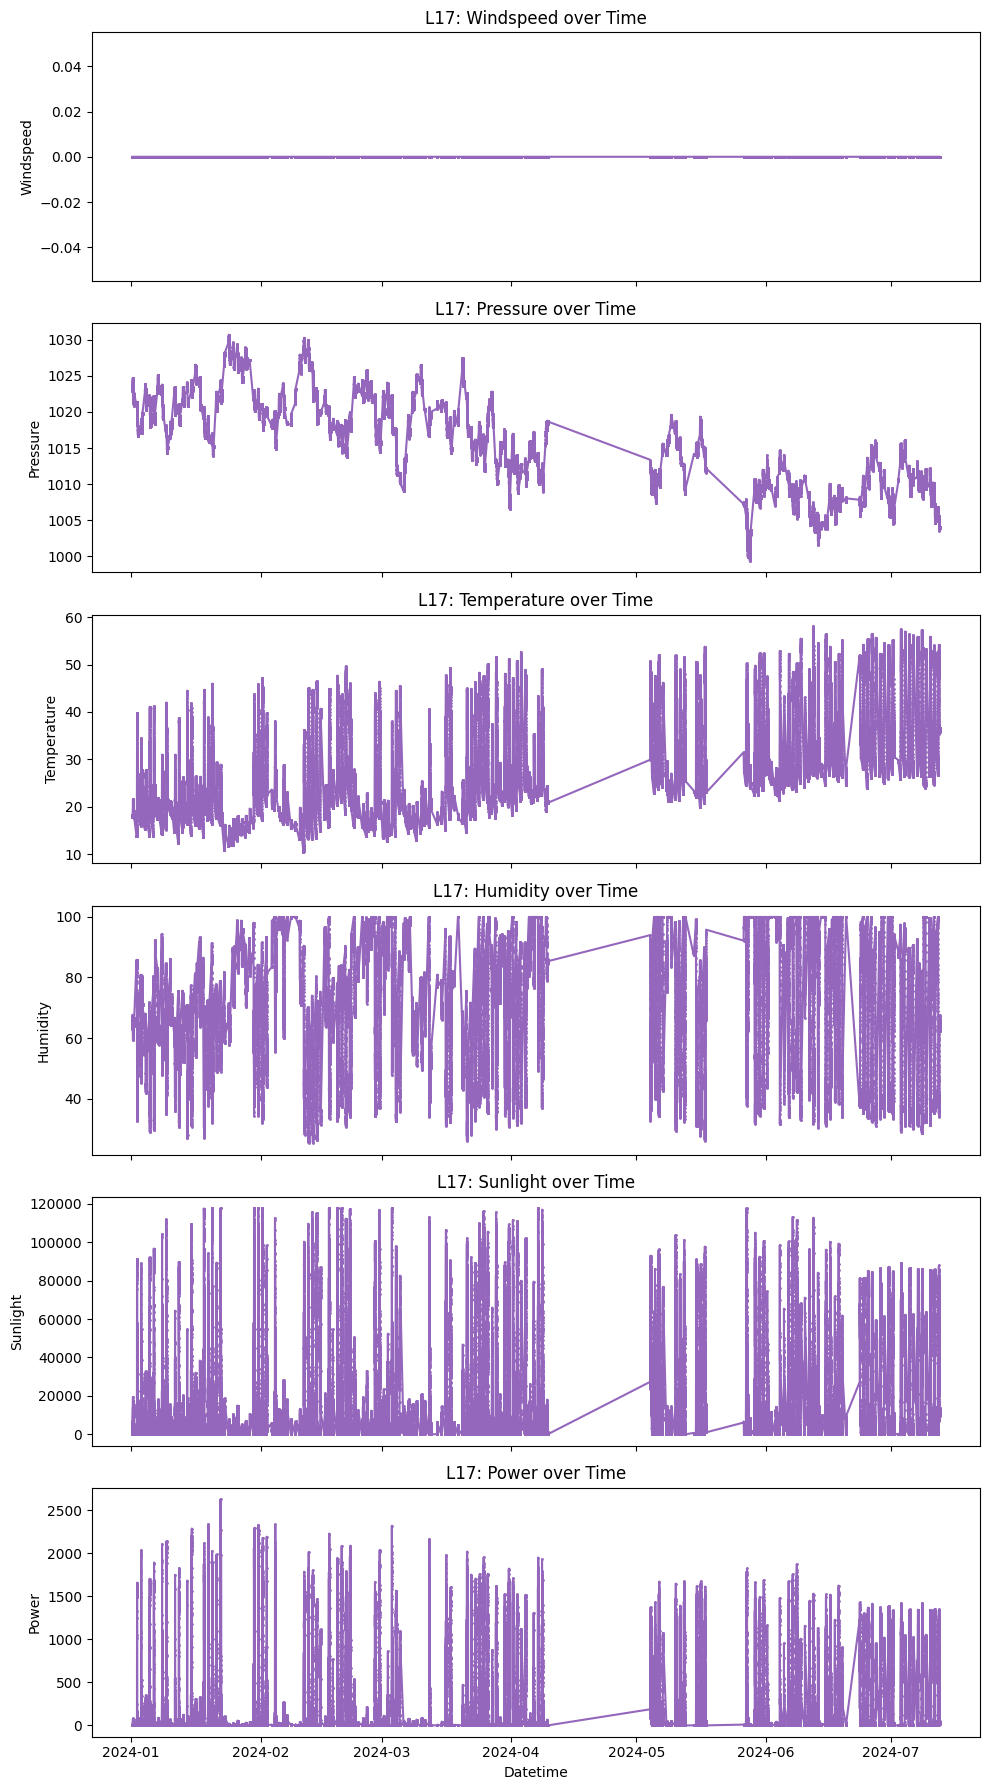

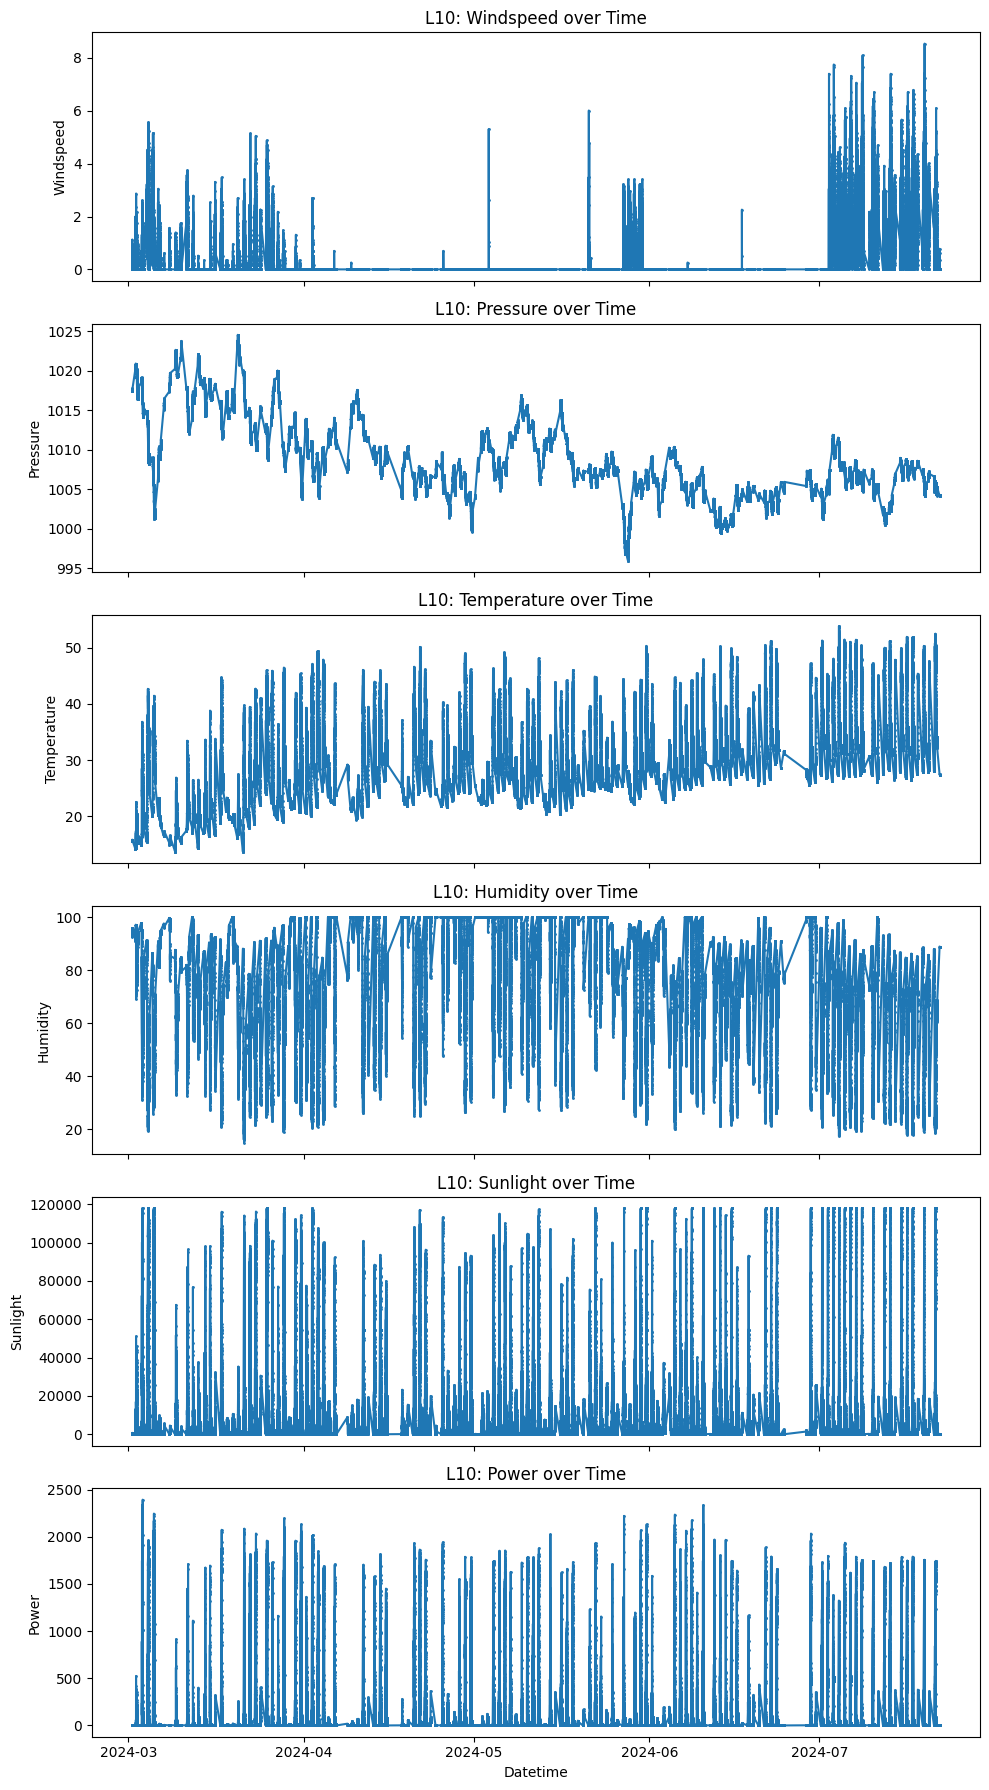

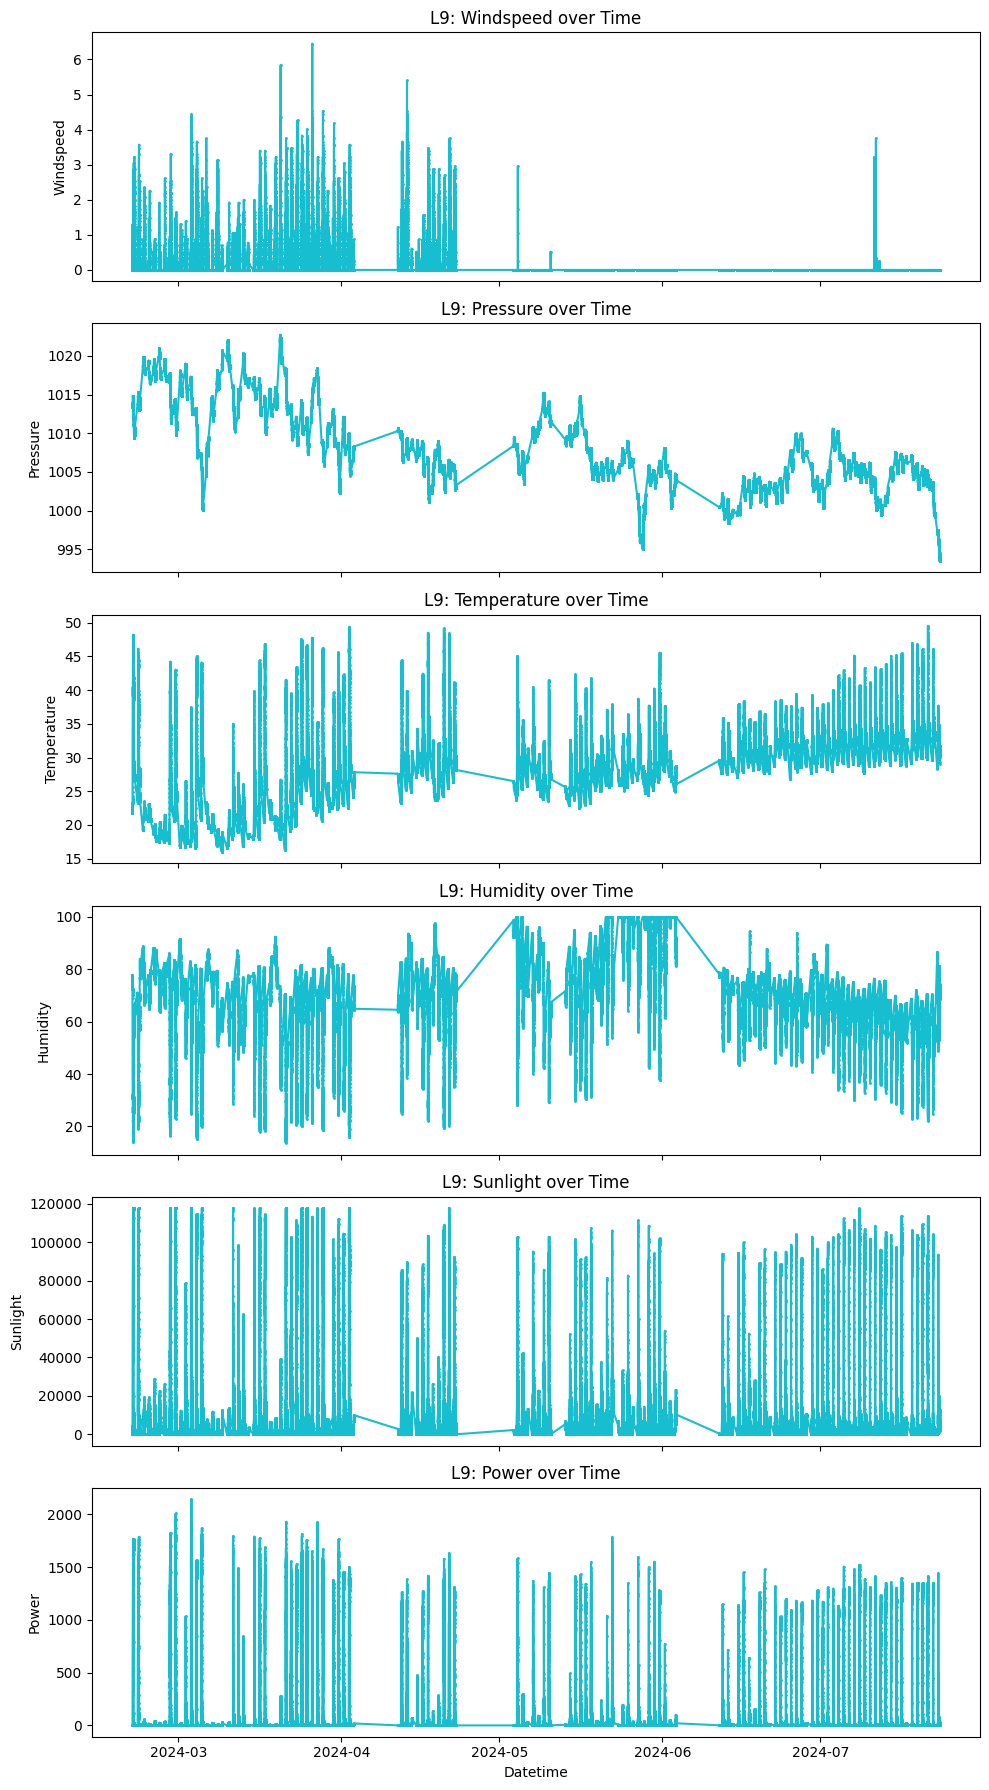

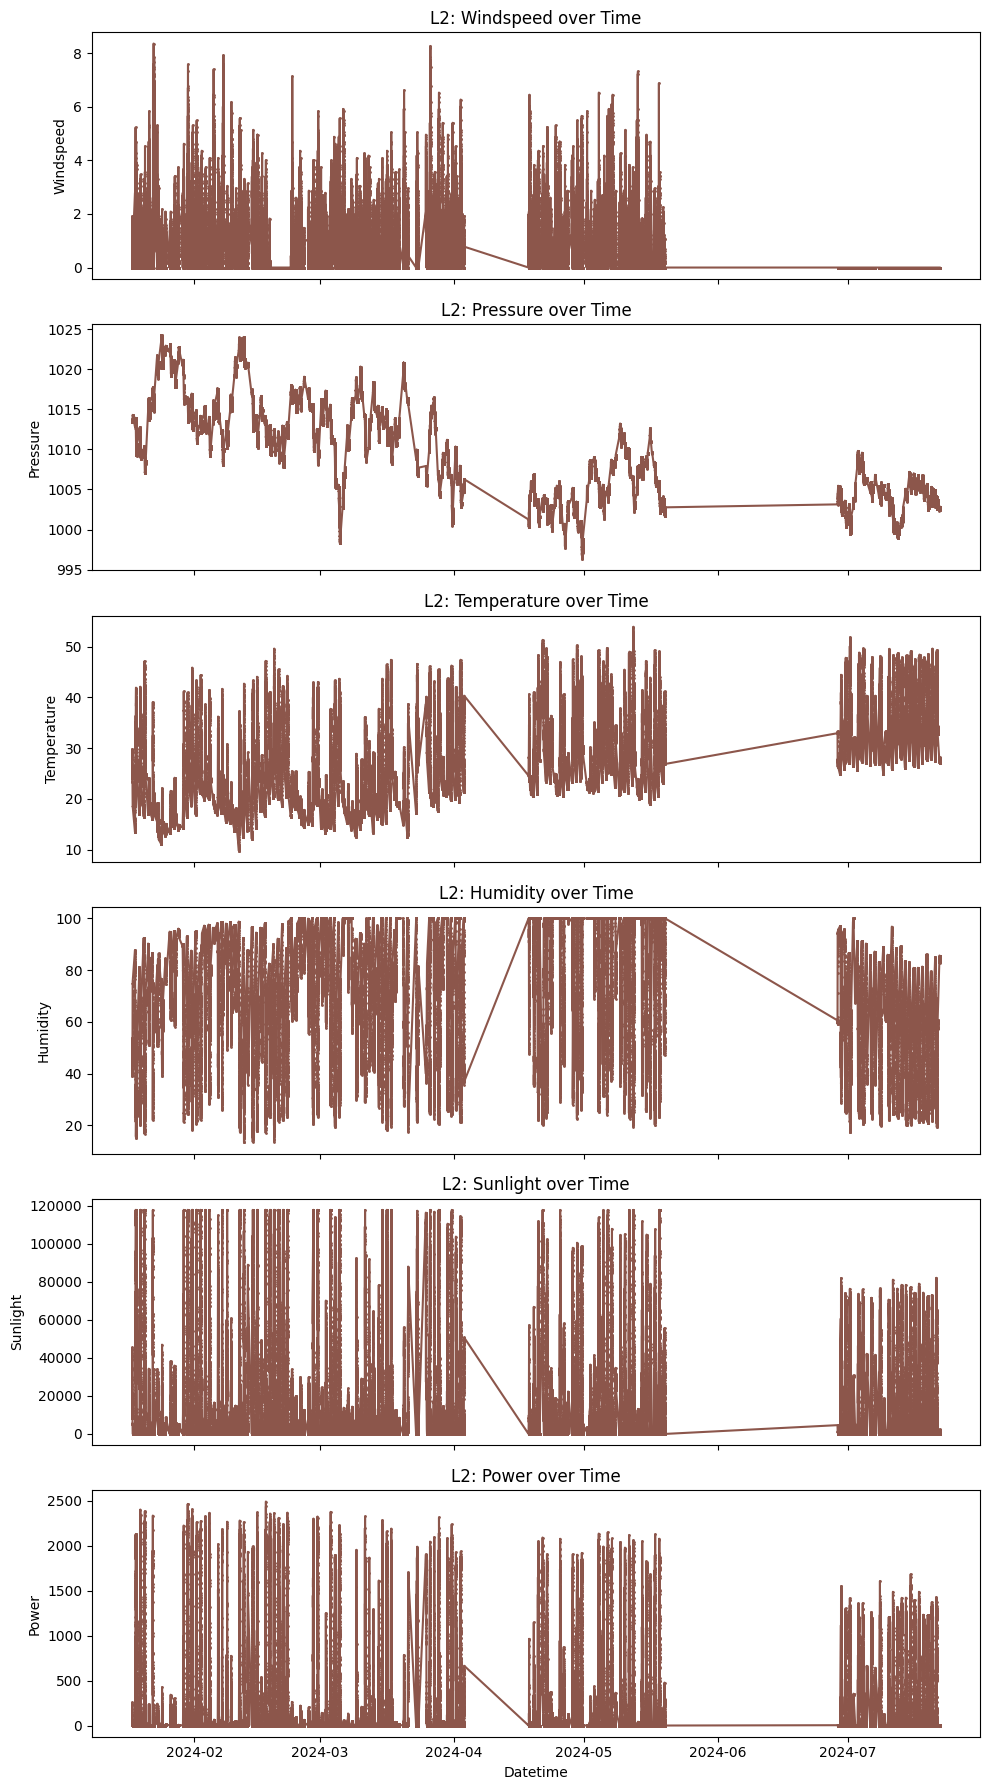

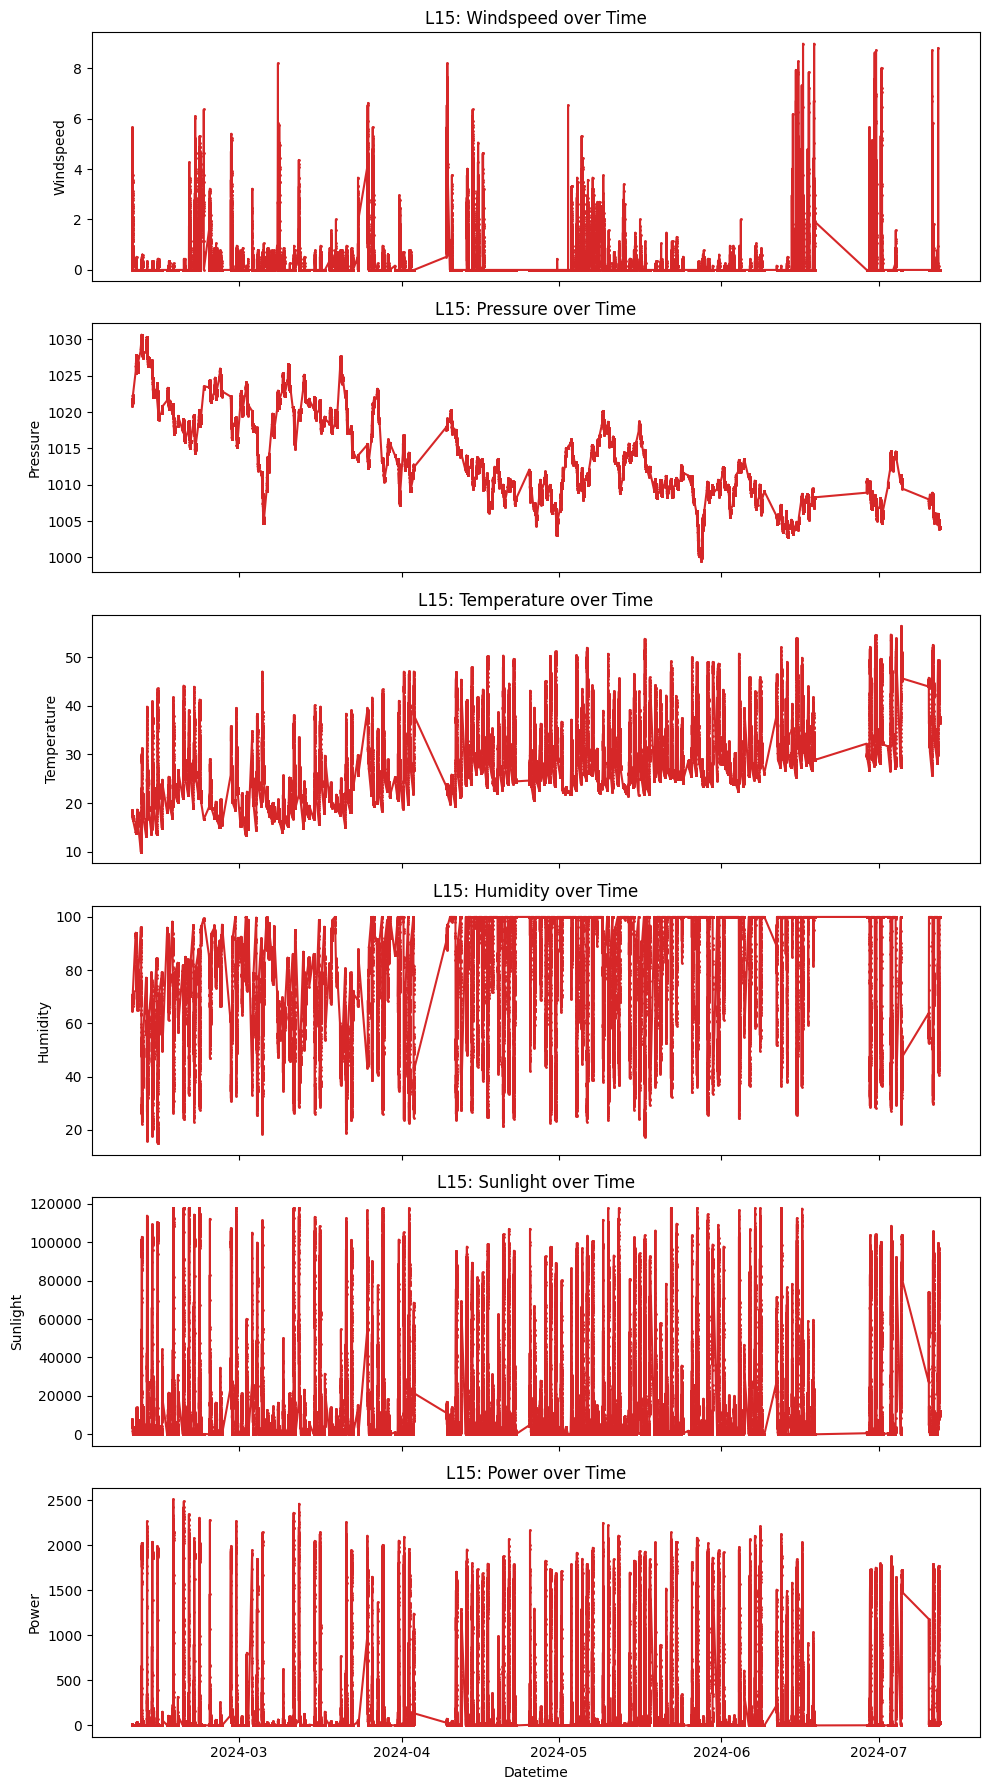

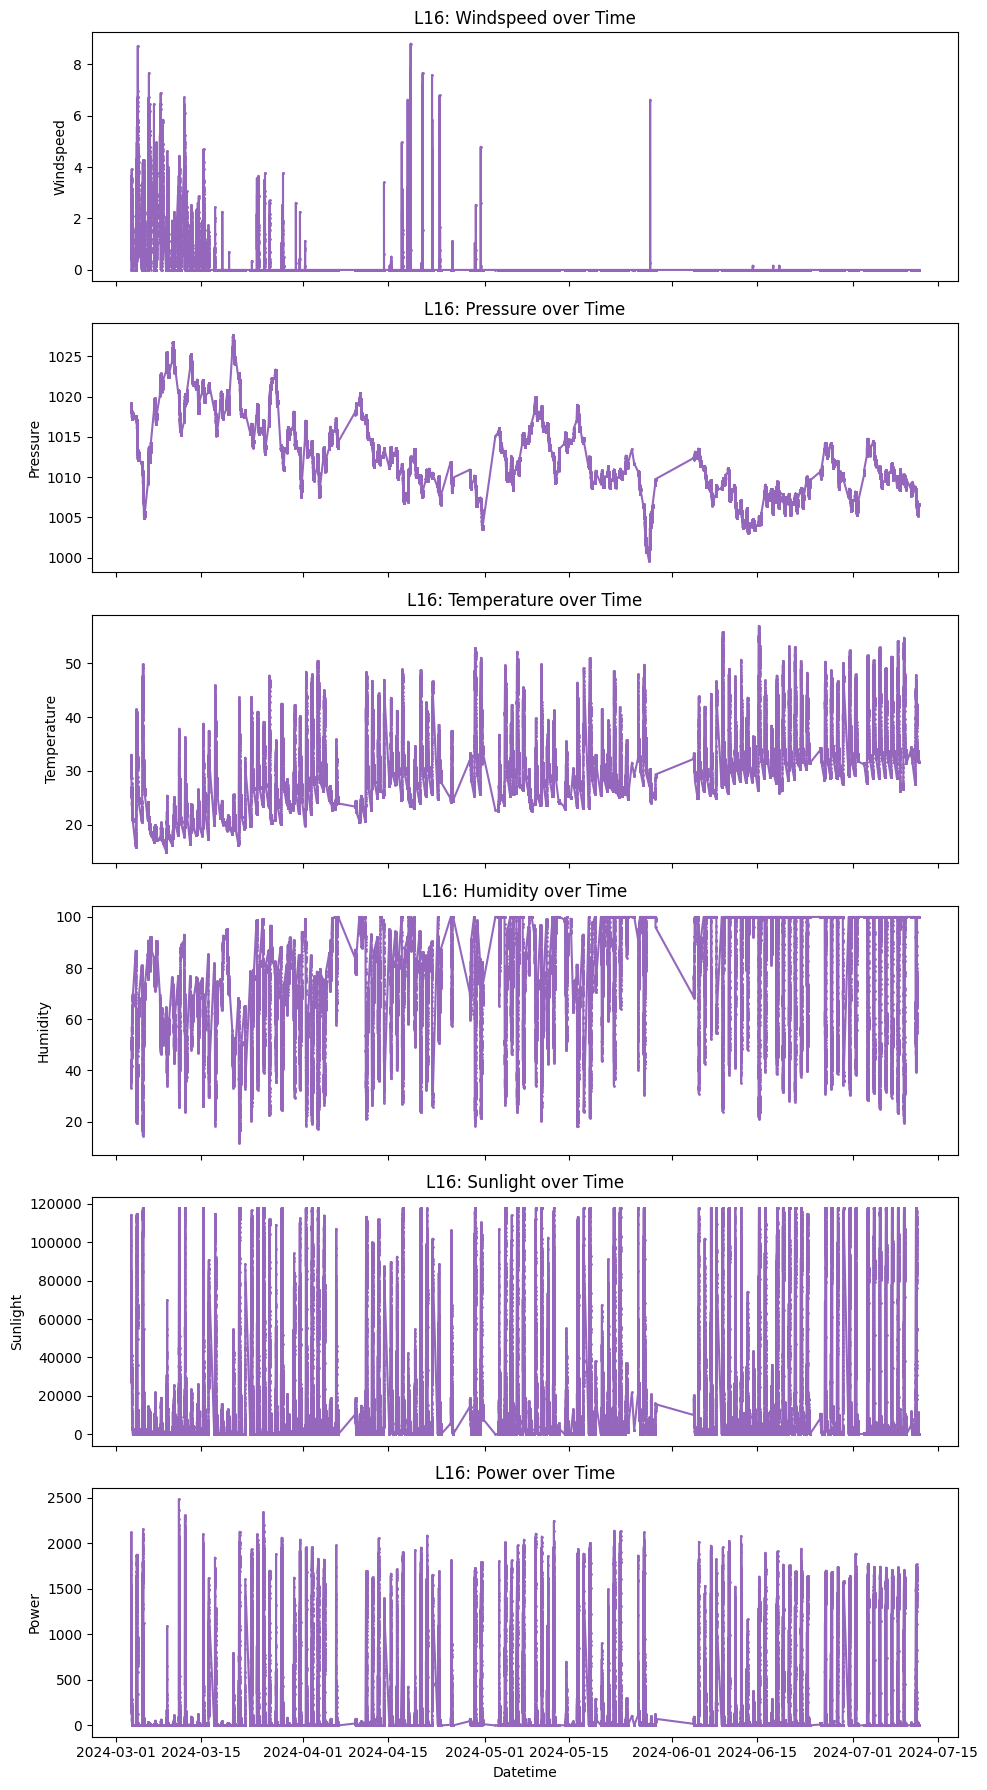

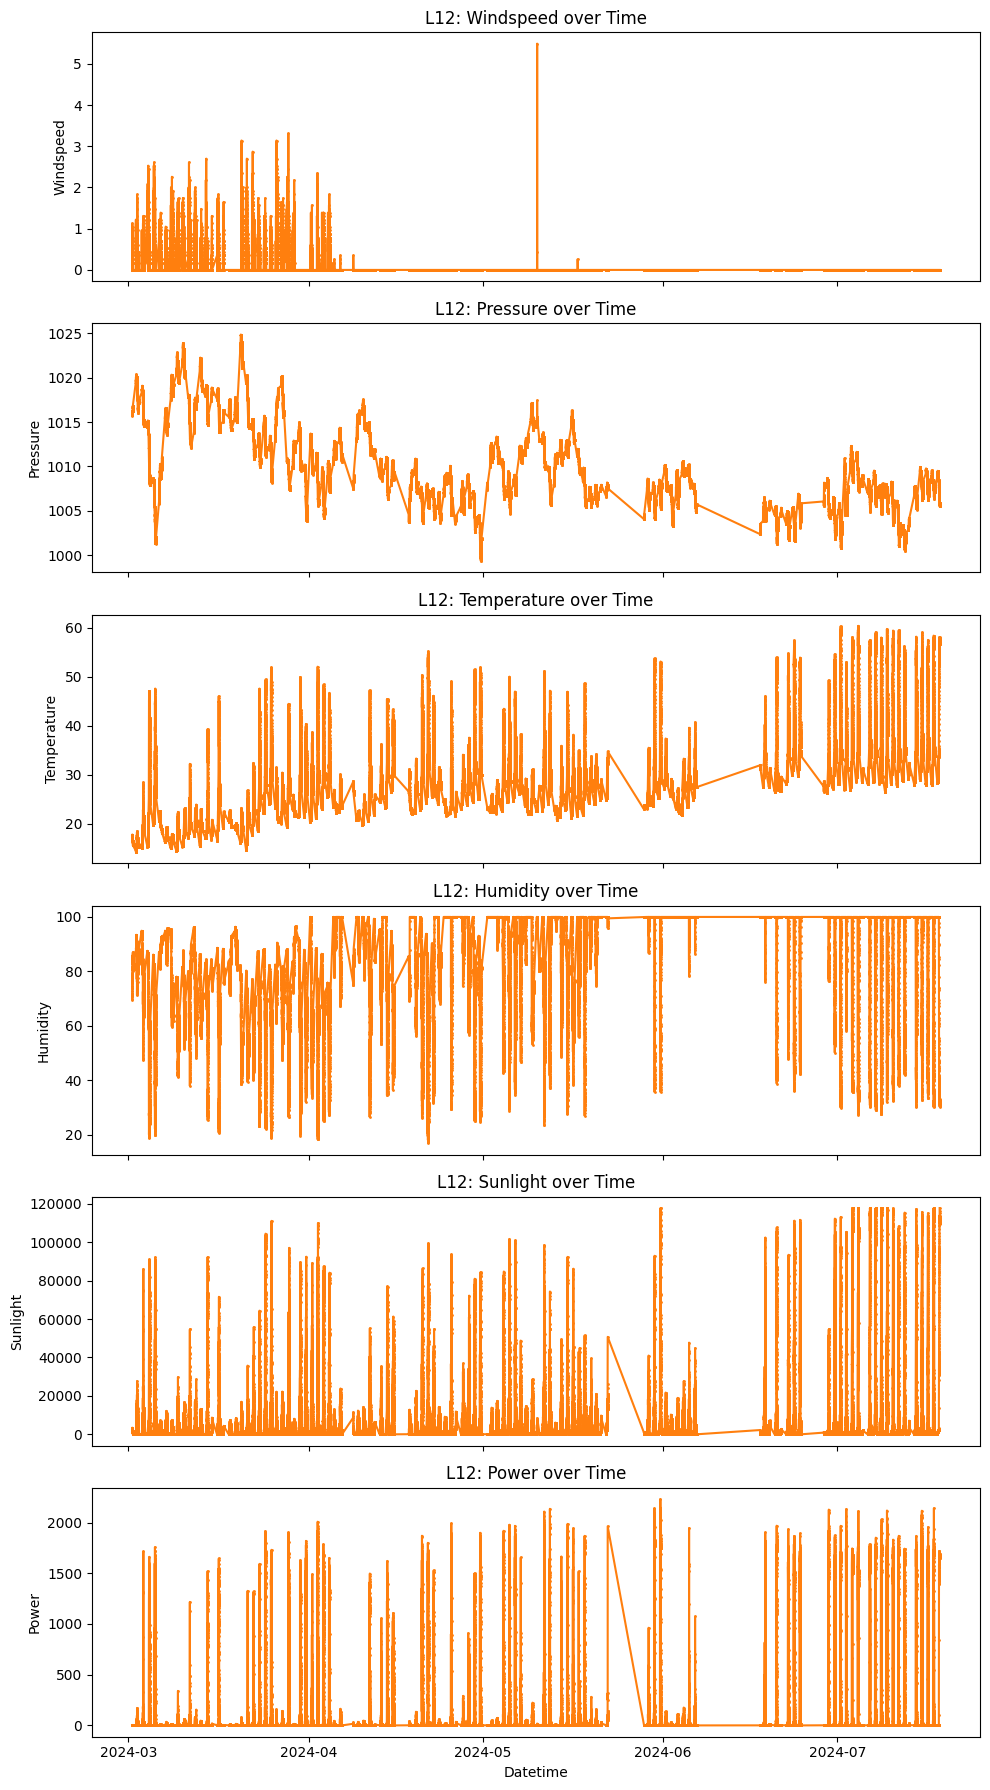

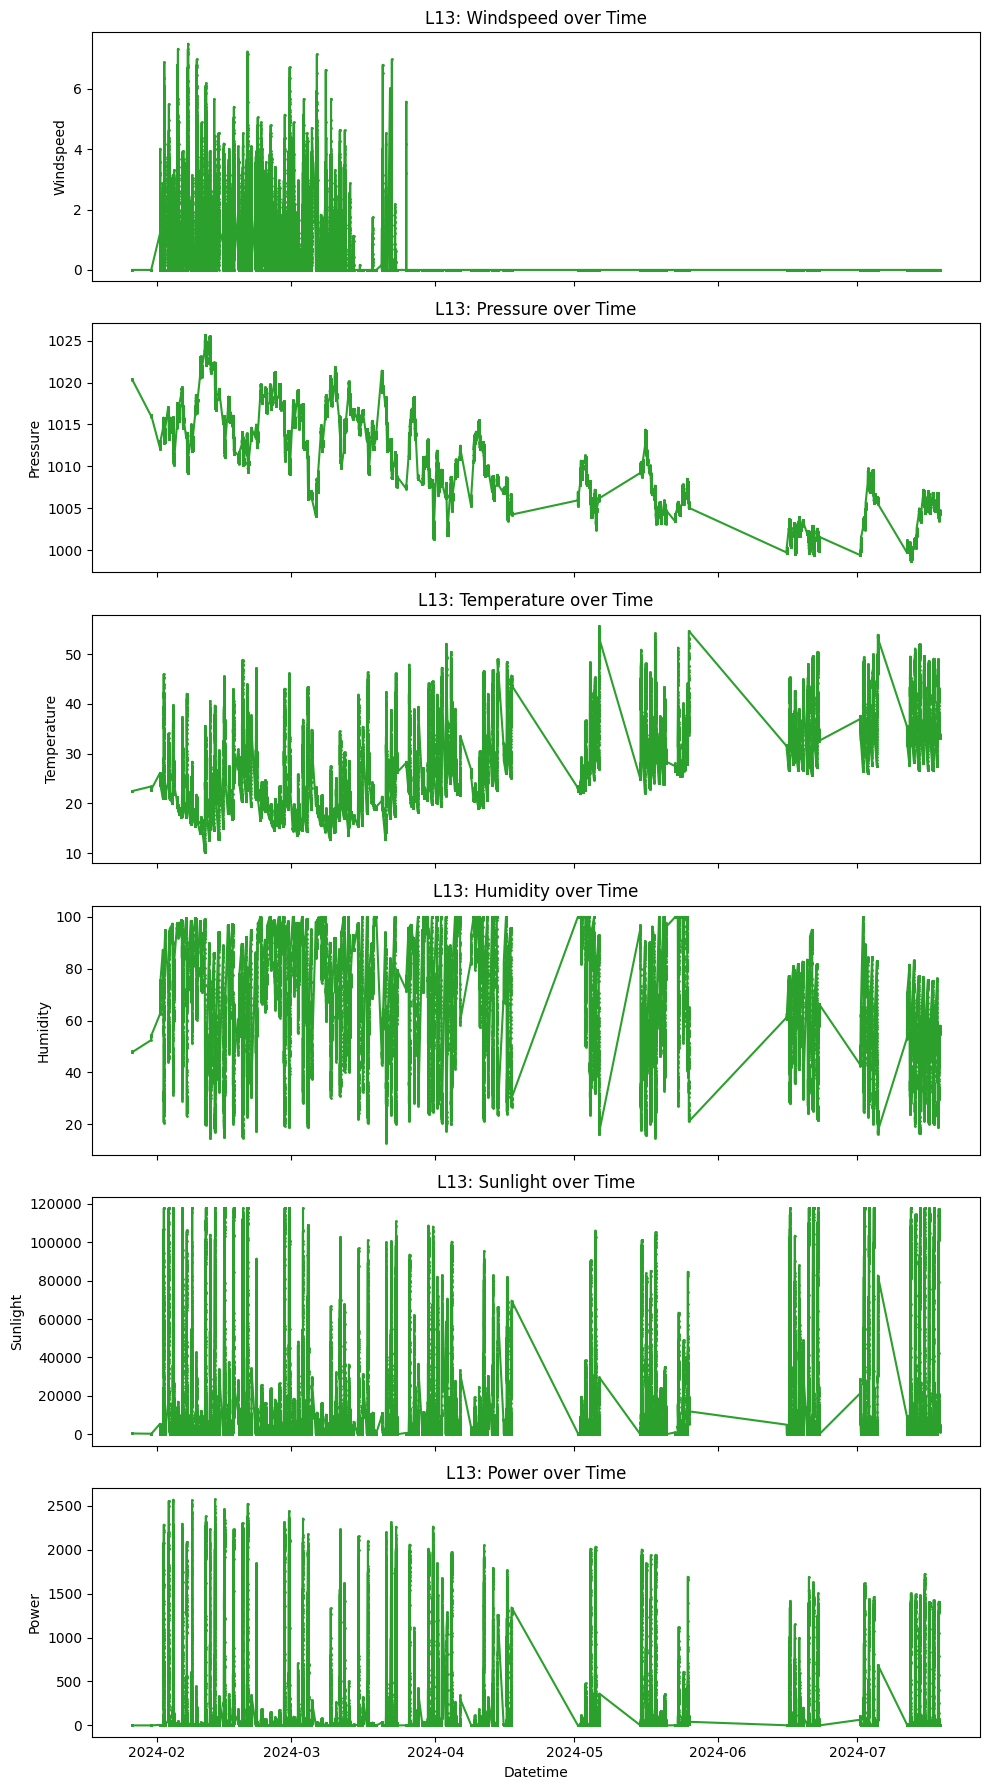

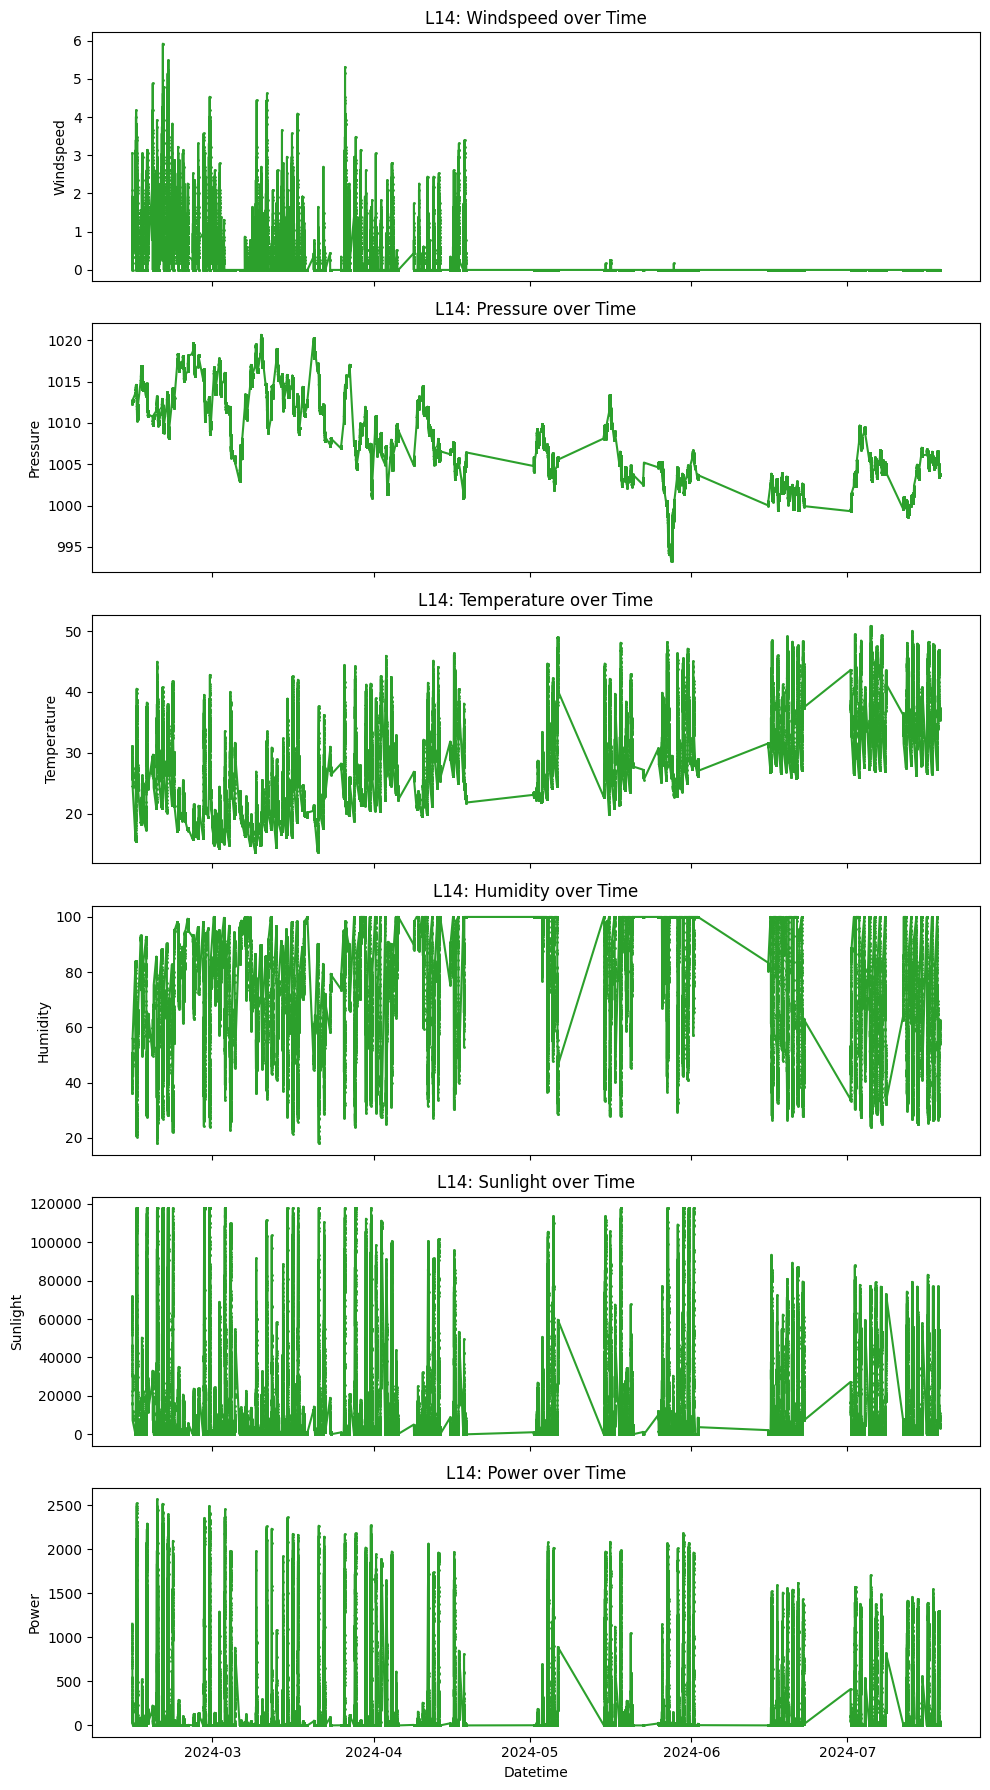

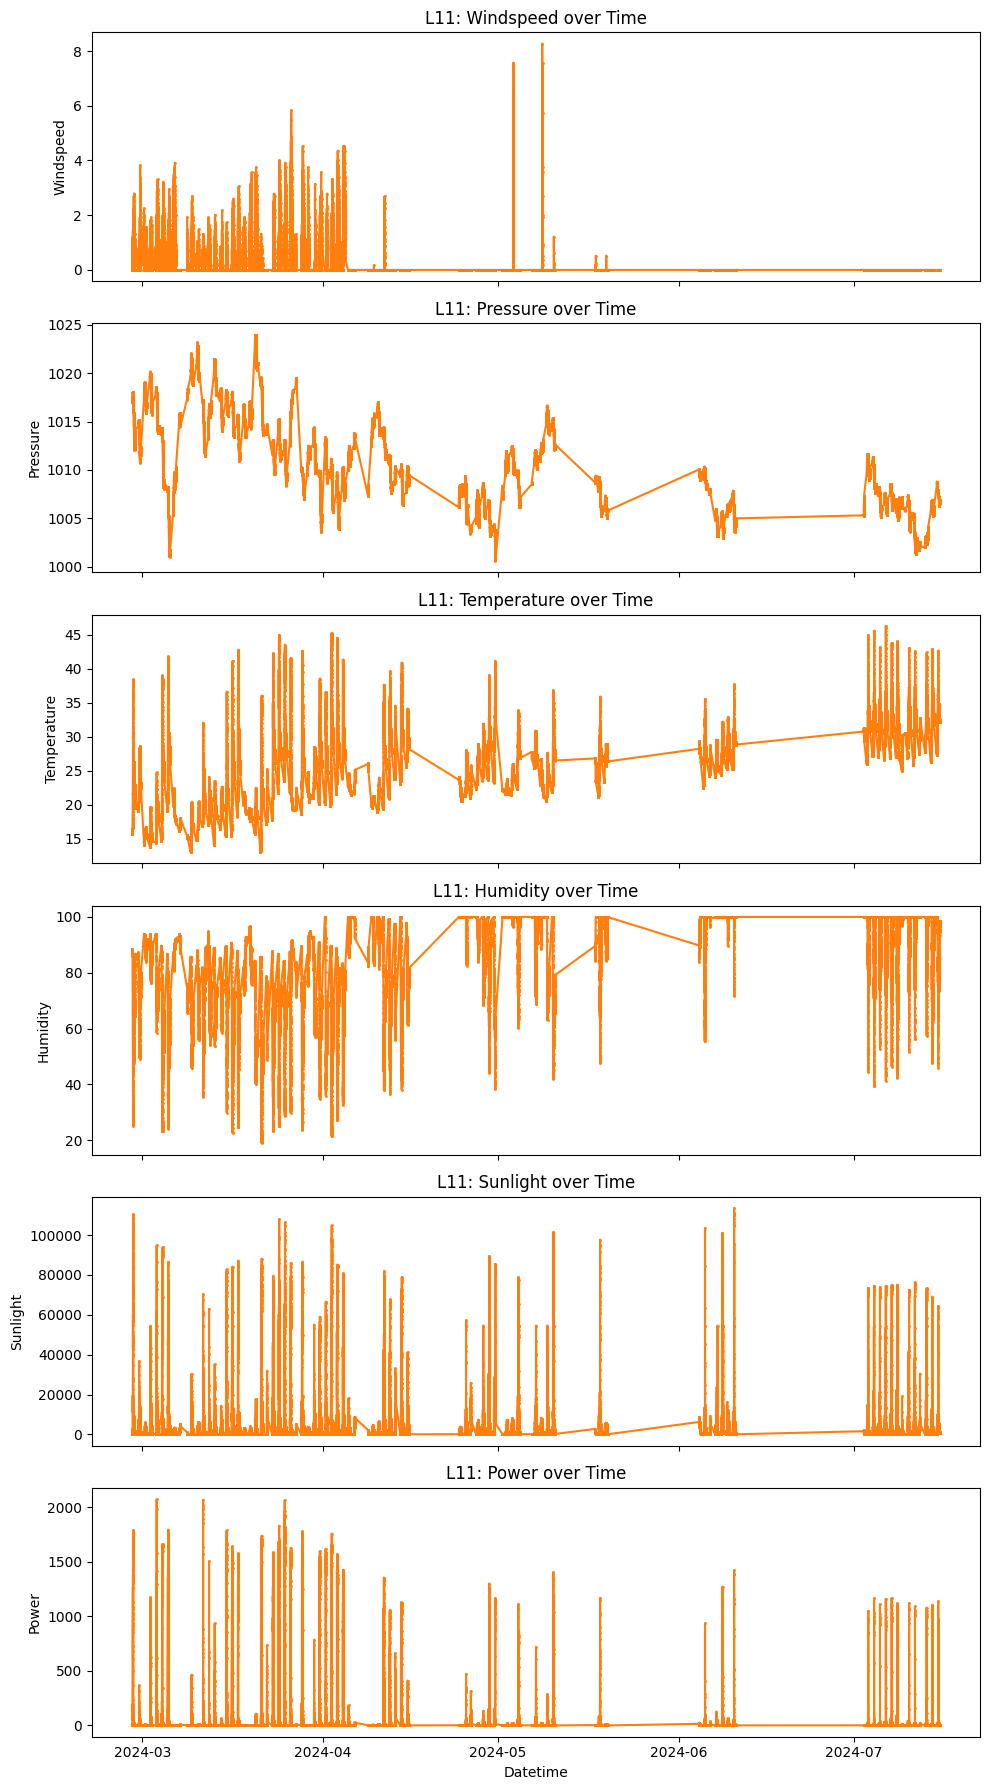

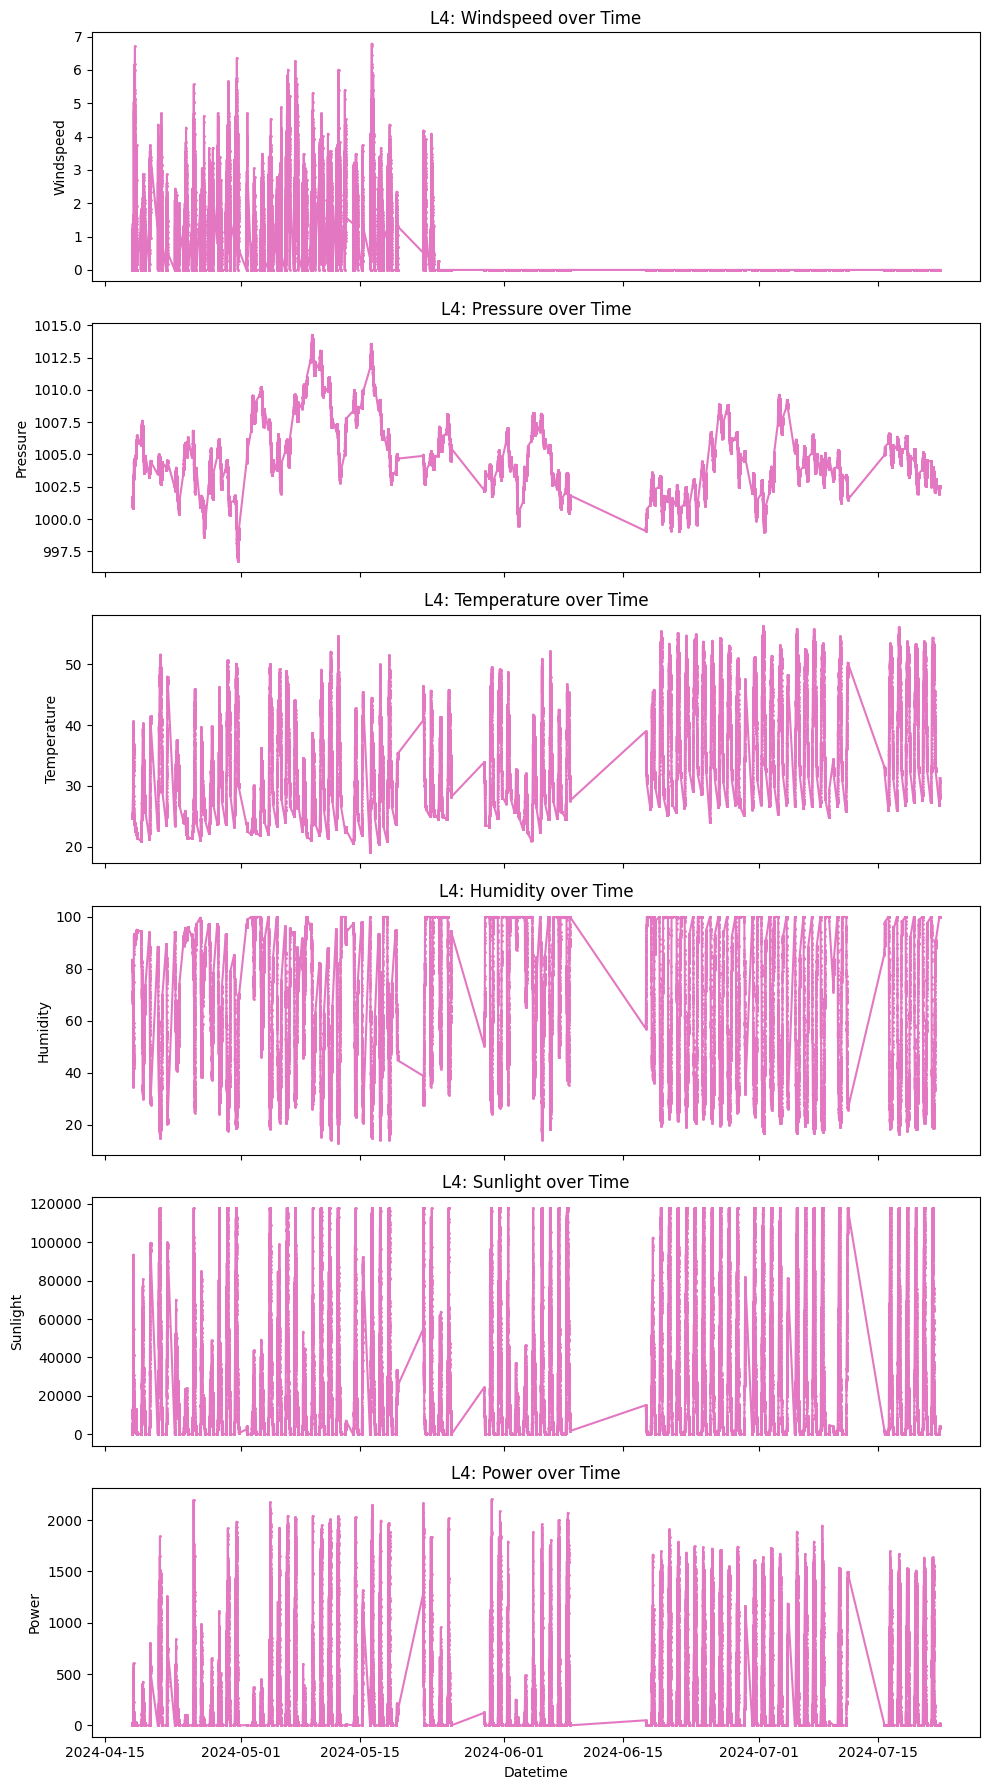

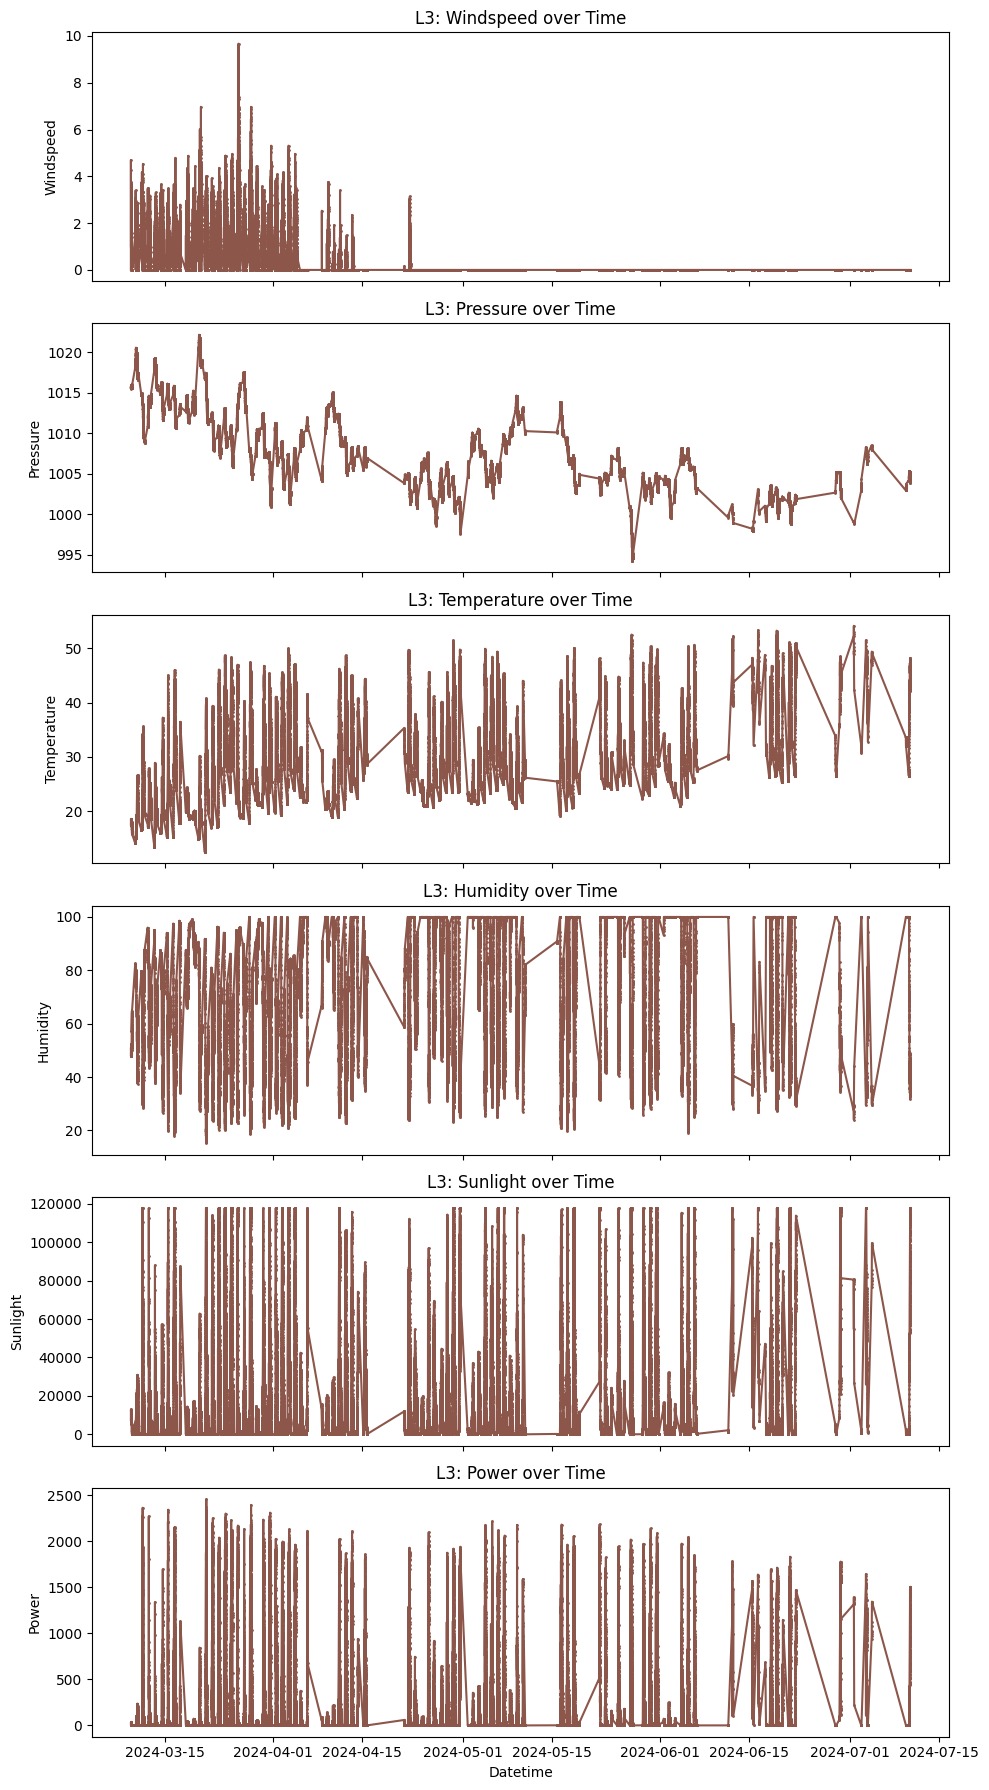

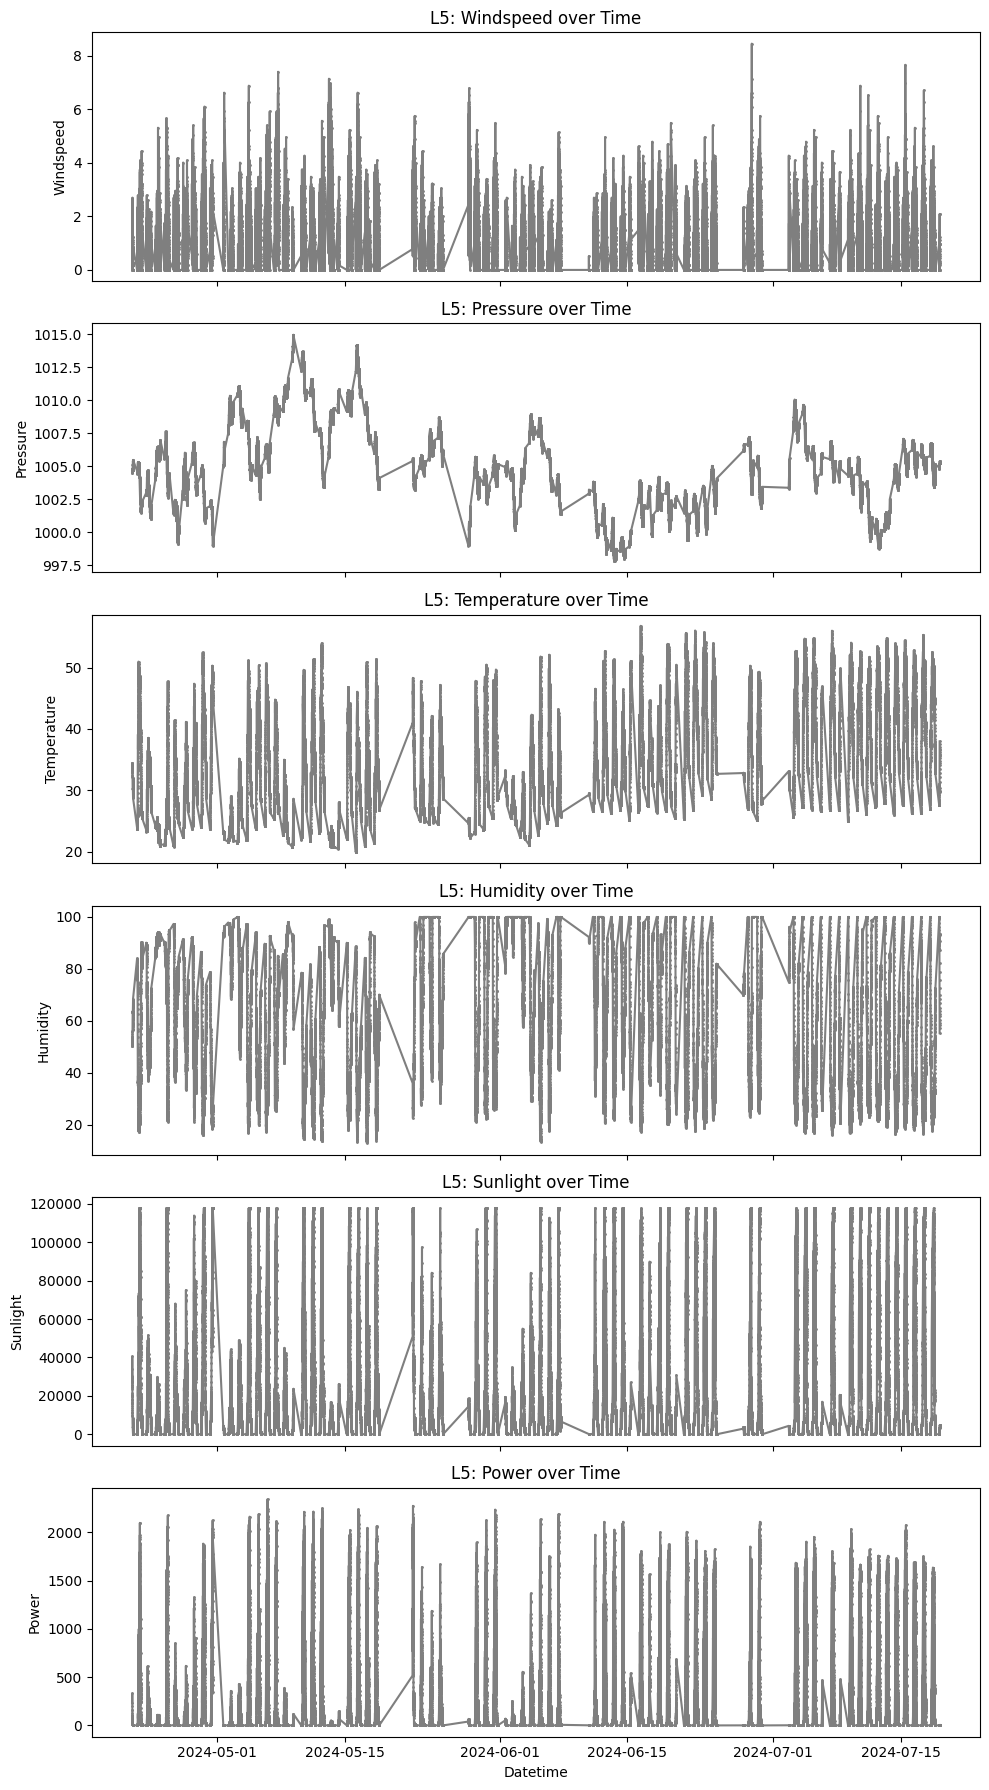

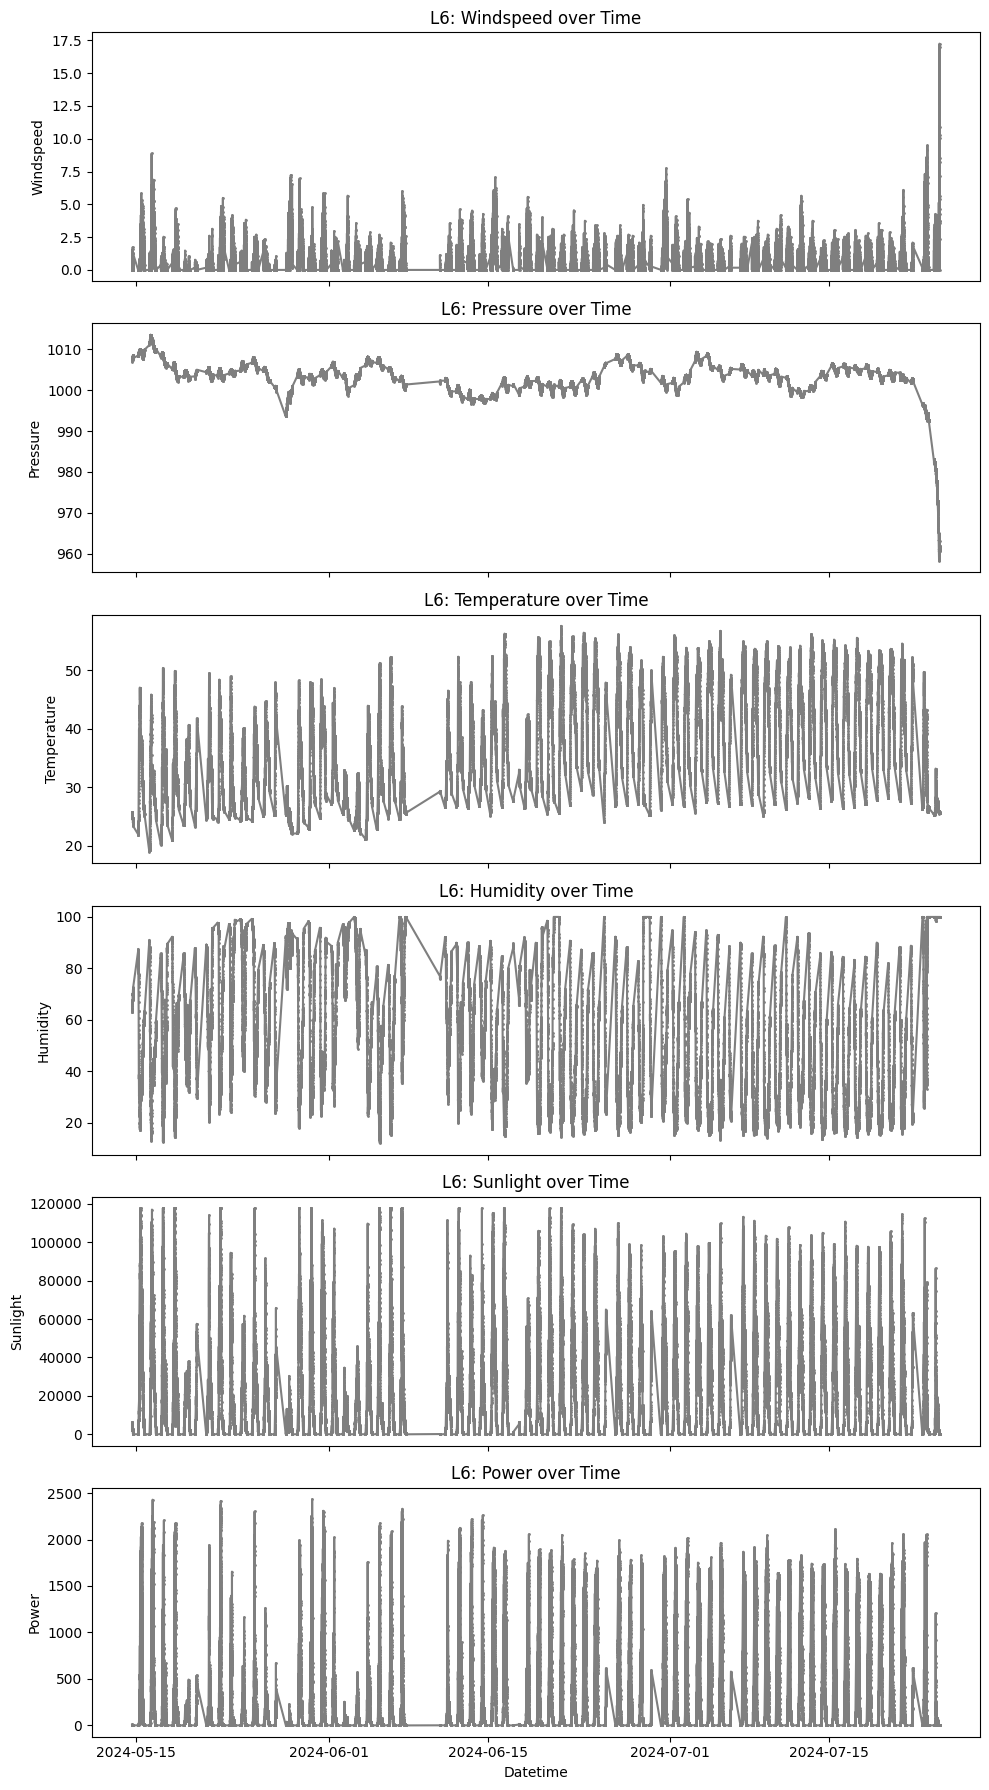

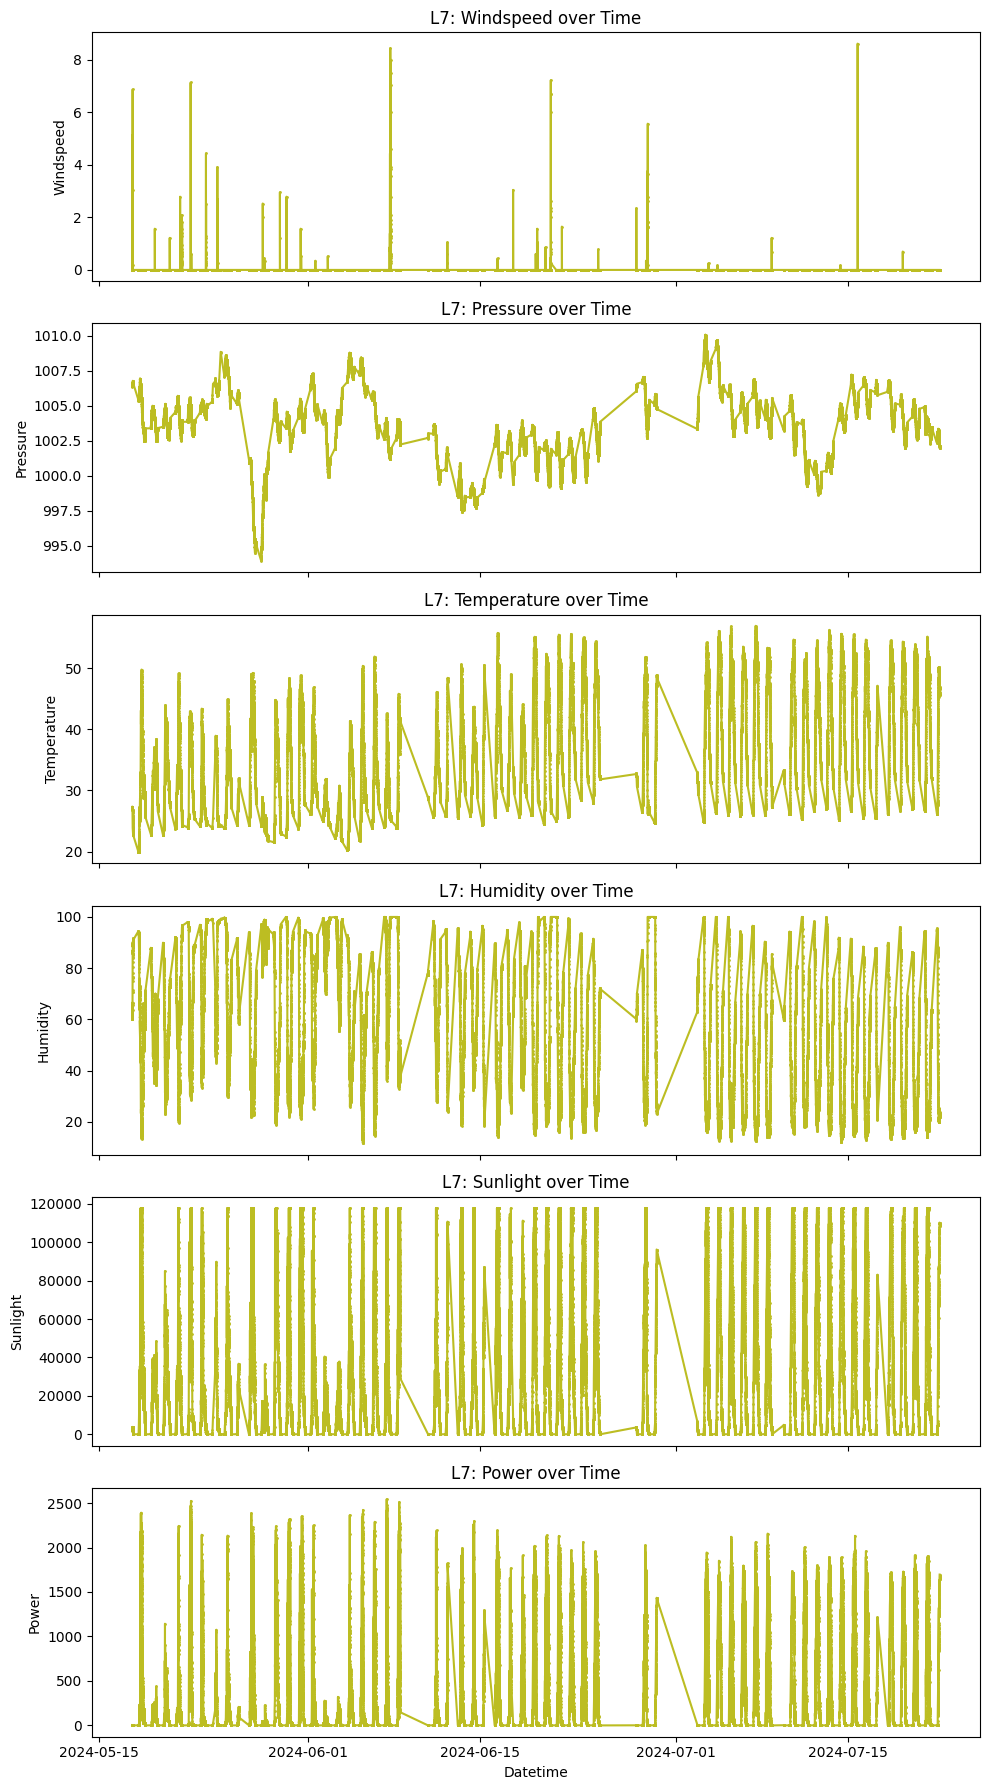

In [24]:
for device in df_raw_data.device.value_counts().index:
    feature_plot(df_raw_data, device)